In [518]:
import pandas as pd
import numpy as np
import yfinance as yf
from hurst import compute_Hc
import datetime as dt
import matplotlib.pyplot as plt

%matplotlib inline
plt.style.use('seaborn-darkgrid')

import warnings
warnings.filterwarnings('ignore')
import seaborn

from scipy.stats import pearsonr

In [519]:
ftse_all_share_data = yf.download('^FTAI', start='2020-12-01')

[*********************100%***********************]  1 of 1 completed


In [520]:
ftse_all_share_data_weekly = ftse_all_share_data.asfreq('w', method='ffill')

In [521]:
ftse_all_share_data_weekly = ftse_all_share_data_weekly.drop(['Open', 'High', 'Low', 'Close','Volume'],axis=1)

In [522]:
ftse_all_share_data_weekly

,Adj Close
Date,
2020-12-06,1068.880005
2020-12-13,1061.180054
2020-12-20,1094.540039
2020-12-27,1127.920044
2021-01-03,1157.040039
...,...
2023-05-07,828.789978
2023-05-14,816.960022
2023-05-21,808.969971


In [523]:
ftse_all_share_data_weekly.index = pd.to_datetime(ftse_all_share_data_weekly.index)

In [524]:
'The Hurst exponent is %.2f' % compute_Hc(ftse_all_share_data_weekly, kind='price')[0]

'The Hurst exponent is 0.81'

In [525]:
ftse_all_share_data_weekly

,Adj Close
Date,
2020-12-06,1068.880005
2020-12-13,1061.180054
2020-12-20,1094.540039
2020-12-27,1127.920044
2021-01-03,1157.040039
...,...
2023-05-07,828.789978
2023-05-14,816.960022
2023-05-21,808.969971


In [535]:
def calc_corr(data, lookback, hold):
    data = data.copy()

    data['lookback_returns'] = data['Adj Close'].pct_change(lookback)
    

    data['hold_returns'] = data['Adj Close'].pct_change(hold).shift(-hold)
    data = data.dropna()
    data = data.iloc[::hold]

    
    corr, p_value = pearsonr(data['lookback_returns'],
                             data['hold_returns'])

    return corr, p_value

In [536]:
def plot_grid(data_to_plot, vmin, vmax, cmap, title_name):

    # Plot heatmap and set the style
    fig, ax = plt.subplots(figsize=(10, 7))
    ax = seaborn.heatmap(data_to_plot, cmap=cmap,
                         annot=True, vmin=vmin, vmax=vmax, xticklabels=hold, yticklabels=lookback)
    
    # Adjust top and bottom y-axis
    bottom, top = ax.get_ylim()
    ax.set_ylim(bottom + 0.5, top - 0.5)

    # Label the heatmap
    plt.title(title_name, fontsize=14)
    plt.xlabel('Hold', fontsize=12)
    plt.ylabel('Lookback', fontsize=12)
    plt.show()

In [537]:
lookback = [1,2,3,4,5,6,7,8,9,10]
hold = [1,2,3,4,5,6,7,8,9,10]
ftse_all_share_data_weekly = ftse_all_share_data_weekly.dropna()
corr_grid = np.zeros((len(lookback), len(hold)))
p_value_grid = np.zeros((len(lookback), len(hold)))

for i in range(len(lookback)):
    for j in range(len(hold)):
        corr_grid[i][j], p_value_grid[i][j] = calc_corr(
            ftse_all_share_data_weekly, lookback[i], hold[j])

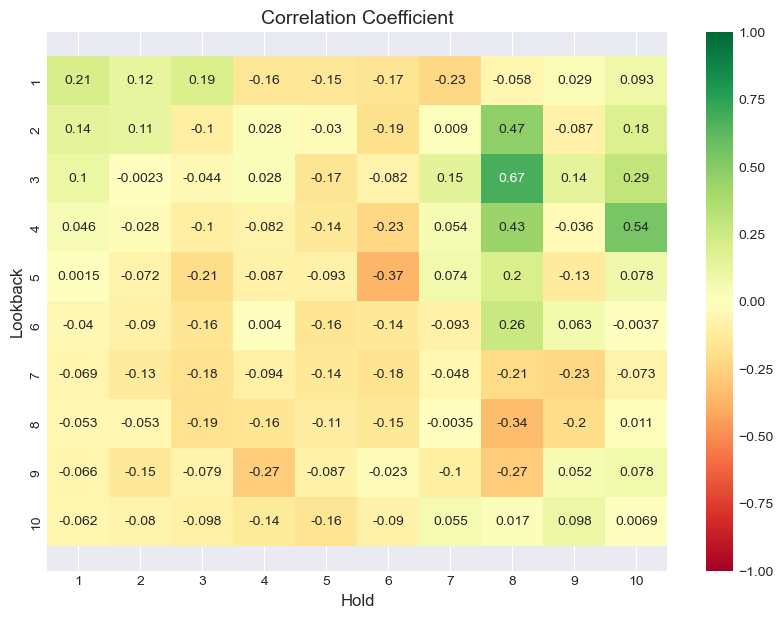

Lookback Optimal: 3
Hold Optimal: 8


In [539]:
# Call plot_grid function and plot correlation cofficient
plot_grid(corr_grid, vmin=-1, vmax=1, cmap='RdYlGn',
          title_name='Correlation Coefficient')

# Find maximum value of correlation coefficient
opt = np.where(corr_grid == np.max(corr_grid))

# Find the optimal lookback and holding period
opt_lookback = lookback[opt[0][0]]
opt_hold = hold[opt[1][0]]
print('Lookback Optimal:', opt_lookback)
print('Hold Optimal:', opt_hold)

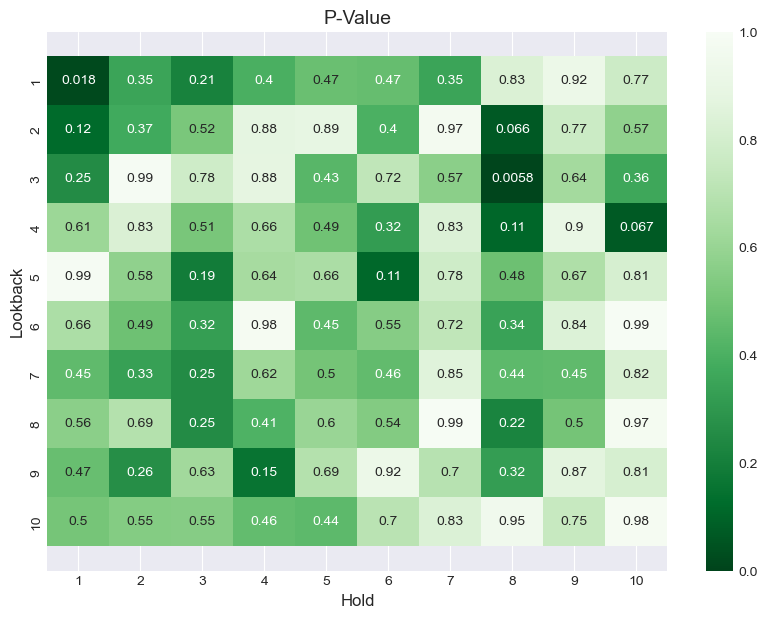

In [540]:
plot_grid(p_value_grid, vmin=0, vmax=1, cmap='Greens_r', title_name='P-Value')